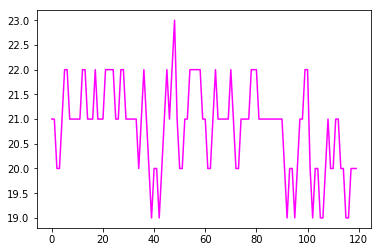

測定結果: 58.33


In [19]:
# OpenCV のインポート
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import cv2

#変数の設定
x = np.array([0]*120)
y = 0
z = np.arange(120)

# VideoCaptureのインスタンスを作成する。
cap = cv2.VideoCapture(0)

while True:
    # VideoCaptureから1フレーム読み込む
    ret, frame = cap.read()
    cv2.putText(frame, 'Put yor finger onto the camera,', (0,40), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255,0), 3, cv2.LINE_AA)
    cv2.putText(frame, 'then push ESC key.', (0,450), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255,0), 3, cv2.LINE_AA)
    frame = cv2.resize(frame, (int(frame.shape[1]/2), int(frame.shape[0]/2)))
    
    cv2.imshow('Raw Frame', frame)

    #キー入力を1ms待って、k が27（ESC）だったらBreakする
    k = cv2.waitKey(1)
    if k == 27:
        break

while True:

    # VideoCaptureから1フレーム読み込む
    ret, frame = cap.read()
    cv2.putText(frame, 'measuring now.', (0,40), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255,0), 3, cv2.LINE_AA)
    frame = cv2.resize(frame, (int(frame.shape[1]/2), int(frame.shape[0]/2)))
    cv2.imshow('Raw Frame', frame)

    if y < 120: #指定回数だけ取得
        x[y] = frame[80,160,1]/4 + frame[160,160,1]/4+ frame[80,140,1]/4+ frame[160,140,1]/4  # 画像中央付近の緑色成分を取得
        y = y + 1
    else:
        break

    #キー入力を1ms待って、k が27（ESC）だったらBreakする
    k = cv2.waitKey(1)
    if k == 27:
        break
        
# 測定結果の計算
x2 = np.array([0]*120)
# 測定値を重み付きの平均値フィルタにかける
for i in range(120):
    if i-1 > -1 and i+1 < 120:
        x2[i] = x[i+1]/4 +x[i]/2+ x[i-1]/4
    elif i==0:
        x2[i] = x[i+1]/2 +x[i]/2
    else:
        x2[i] = x[i]/2 + x[i-1]/2
sleep(0.5)
plt.plot(z, x2, color ="magenta") #測定された輝度のグラフを表示
plt.show()
sleep(0.5)
pul = 0
# 測定値のうち、極小値のようになる部分を判定
for i in range(1,119):
    if x2[i-1]-x2[i]>0 and x2[i+1]-x2[i]>0: #グラフのボトムの判定
        pul = pul + 1 #測定時間での鼓動回数
pul = pul * 10**3 / 120 #一分あたりに変換
print("測定結果:",round(pul,2))

while True:
    # VideoCaptureから1フレーム読み込む
    ret, frame = cap.read()
    cv2.putText(frame, 'Your pulse is '+ str(round(pul,2)), (0,40), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255,0), 3, cv2.LINE_AA)
    cv2.putText(frame, 'push ESC key.', (0,450), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255,0), 3, cv2.LINE_AA)
    frame = cv2.resize(frame, (int(frame.shape[1]/2), int(frame.shape[0]/2)))
    
    cv2.imshow('Raw Frame', frame)

    #キー入力を1ms待って、k が27（ESC）だったらBreakする
    k = cv2.waitKey(1)
    if k == 27:
        break

# キャプチャをリリースして、ウィンドウをすべて閉じる
cap.release()
cv2.destroyAllWindows()